## [CS 329E] Elements of Data Analytics Term Project
#### by Akshay Prakash


This term project exists to ask the following: Does the type of medical care provider affect the number of deaths in jails in the United States?

This project utilizes data from https://www.reuters.com/investigates/special-report/usa-jails-graphic/, a Reuters study into the prevalence of inmate deaths between the years 2008 and 2019.


In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

The following data is a collection of the deaths in  jails across the United States. This comma seperated value file (csv) contains information about individual jails, such as the state, county, and the number and types (suicide, homicide, illness, accident, drug/alcohol related, other) of deaths in each year. It also states the jail's medical care provider.

In [2]:
death_df = pd.read_csv("all_jails.csv")
death_df

,id,fips,statecode,state,state_notes,county,jail,jail_notes,d2008,d2009,...,med2010,med2011,med2012,med2013,med2014,med2015,med2016,med2017,med2018,med2019
0,1,1003.0,AL,Alabama,NaN,Baldwin,Baldwin County Corr. Center,NaN,0.0,0.0,...,public,public,public,public,public,public,public/Quality Correctional Health Care,Quality Correctional Health Care,Quality Correctional Health Care,Quality Correctional Health Care
1,2,1015.0,AL,Alabama,NaN,Calhoun,Calhoun County Jail,NaN,0.0,1.0,...,public,public,public,public,public,public/Quality Correctional Health Care,Quality Correctional Health Care,Quality Correctional Health Care/Southern Heal...,Southern Health Partners,Southern Health Partners
2,3,1055.0,AL,Alabama,NaN,Etowah,Etowah County Detention Center,NaN,0.0,0.0,...,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,Doctors' Care Family Medical Services,NaN
3,4,1069.0,AL,Alabama,NaN,Houston,Houston County Jail,NaN,1.0,0.0,...,public,public,public,public,public,public,public,public,public,public
4,5,1073.0,AL,Alabama,NaN,Jefferson,Jefferson County Birmingham Jail,ADP for 2008 was based on data provided by the...,NaN,NaN,...,Health Assurance,Health Assurance/Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare,Advanced Correctional Healthcare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,498,56021.0,WY,Wyoming,NaN,Laramie,Laramie County Detention Facility,NaN,0.0,0.0,...,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath
519,499,56025.0,WY,Wyoming,NaN,Natrona,Natrona County Detention Center,NaN,0.0,1.0,...,public,public,public,public,public,public,public,public,public,NaN
520,500,56031.0,WY,Wyoming,NaN,Platte,Platte County Detention Center,NaN,0.0,0.0,...,public,public,public,public,public,public,public,public,public,public
521,501,56033.0,WY,Wyoming,NaN,Sheridan,Sheridan County Detention Center,NaN,0.0,0.0,...,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath,Wellpath


As this study concerns itself with the overall number of deaths in each prison over the years of the study, begin by removing the rows that have a null value in either the medical proivders columns or the deaths columns.

In [3]:
# years that the data set concerns
years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

# counter for number of rows with a null value
num_na = 0

public_deaths = pd.DataFrame()
private_deaths = pd.DataFrame()

for year in years:
    
    temp_df = pd.DataFrame()
    
    death_string = 'd' + year
    provider_string = 'med' + year
    
    temp_df = death_df[[death_string, provider_string]].dropna()
    num_na += (523 - temp_df.shape[0])
    temp_df = temp_df.rename(columns = {death_string : 'deaths', provider_string : 'providers'})
    
    public_deaths = pd.concat([public_deaths, temp_df[temp_df['providers'] == 'public']['deaths']], ignore_index=True)
    private_deaths = pd.concat([private_deaths, temp_df[temp_df['providers'] != 'public']['deaths']], ignore_index=True)
    
print('The number of removed rows with null values is {}.'.format(num_na))

The number of removed rows with null values is 204.


In [4]:
public_deaths

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2618,0.0
2619,0.0
2620,1.0
2621,0.0


In [5]:
private_deaths

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3444,0.0
3445,1.0
3446,0.0
3447,0.0


Now that the data is seperated into the two groups, an examination of the data is in order.

In [6]:
public_deaths.describe()

,0
count,2623.000000
mean,1.206634
std,2.568364
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,38.000000


In [7]:
private_deaths.describe()

,0
count,3449.000000
mean,1.249058
std,1.775956
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,19.000000


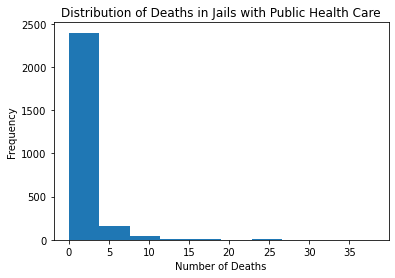

In [8]:
plt.hist(public_deaths)
plt.xlabel("Number of Deaths")
plt.ylabel("Frequency")
plt.title("Distribution of Deaths in Jails with Public Health Care")
plt.show()

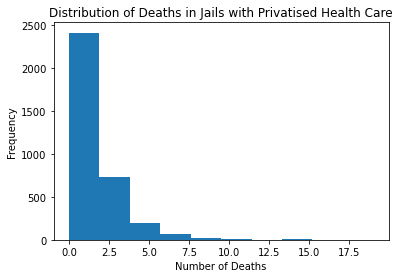

In [9]:
plt.hist(private_deaths)
plt.xlabel("Number of Deaths")
plt.ylabel("Frequency")
plt.title("Distribution of Deaths in Jails with Privatised Health Care")
plt.show()

The number of deaths in prisons with public health providers has a greater standard deviation (2.57 compared to 1.78). From the histograms, the highly-skewed nature of the data is apparent. Perhaps a log-transformation or a square root transformation will make the distribution a little more normal?

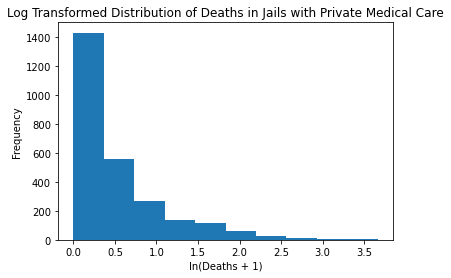

In [24]:
# addition of 1 to account for 0 values
plt.hist(np.log(public_deaths + 1))
plt.ylabel("Frequency")
plt.xlabel('ln(Deaths + 1)')
plt.title("Log Transformed Distribution of Deaths in Jails with Private Medical Care")
plt.show()

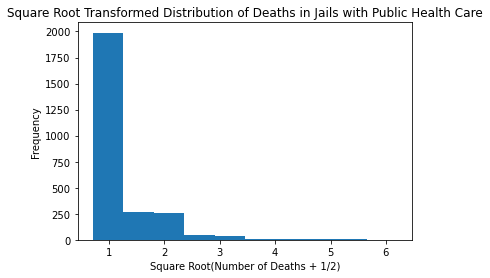

In [11]:
# addition of 1/2 to account for 0 values
plt.hist(np.sqrt((public_deaths + 1/2)))
plt.xlabel("Square Root(Number of Deaths + 1/2)")
plt.ylabel("Frequency")
plt.title("Square Root Transformed Distribution of Deaths in Jails with Public Health Care")
plt.show()

Unfortunately, it does not appear that these transformations will have a signifcant enough impact to allow for the application of the Student's t-test.

Due to the highly-skewed, non-normal shape of the discrete, quantitave data, this project will employ the Mann-Whitney U-test to determine if there is a signifanct difference in the distribution between the two independent groups.

## Does the distribution of the overall number of deaths in jails with public health care differ from the distribution of the overall deaths in jails with a private health care provider?

### 1. set up hypotheses
*H*<sub>0</sub> : The distribution of deaths is the same for private and public health care.

*H*<sub>1</sub> : The distribution of deaths differs between private and public health care.

$\alpha = 0.05$

### 2. select the appropriate test statistic
As the data is skewed, quantitave and discrete and the explanatory variable is nominal and categorical, the Mann-Whitney U-test, and corresponding U-statistic, will be employed:

$$ U_1 = n_1n_2 + \frac{n_1(n_1 + 1)}{2} - R_1 $$ and $$U_2 = n_1n_2 - U_1$$

where$\ R_1$ is the rank sum.

### 3. state the decision rule

As $\ n_1 $ and $\ n_2 > 10$ , the U-statisic can be transformed for comparison against the standard normal distribution as follows: 

$$ Z = \frac{2U-n_1n_2}{\sqrt{n_1n_2(n_1 +n_2+ 1)/3}} $$

Subsequently, the critical value from the standard normal distribution associated with a right-hand tail probability of 
$\ \frac{\alpha}{2} = \frac{0.05}{2} = 0.025 $ is$\ 1.96$.

decision rule: reject$\ H_o$ if $\ Z \ge 1.96 $, otherwise, do not reject $\ H_o $.

### 4. compute the test statistic and correpsonding p-value

In [12]:
all_deaths = pd.concat([private_deaths,public_deaths], keys = ['private', 'public'])

In [13]:
sorted_all_deaths = all_deaths.sort_values(by= 0)
sorted_all_deaths

0
private 0      0.0
        2242   0.0
        2244   0.0
        2245   0.0
        2246   0.0
...            ...
public  2287  26.0
        537   27.0
        1483  28.0
        1263  34.0
        280   38.0

[6072 rows x 1 columns]

In [14]:
ranks = np.array([])

current_rank = 1

for x in sorted_all_deaths[0].unique():
    num_data = sorted_all_deaths.value_counts()[x]
    
    if num_data > 1:
        
        # the mid rank: is assigned to all data that share the same value.
        mid_rank = np.arange(current_rank, current_rank + num_data ).sum() / num_data
        ranks = np.append(ranks, np.ones(num_data) * mid_rank)
        current_rank += num_data

    
    else:
        ranks = np.append(ranks, current_rank)
        current_rank += num_data

In [15]:
sorted_all_deaths['rank'] = ranks
sorted_all_deaths

0    rank
private 0      0.0  1492.0
        2242   0.0  1492.0
        2244   0.0  1492.0
        2245   0.0  1492.0
        2246   0.0  1492.0
...            ...     ...
public  2287  26.0  6068.0
        537   27.0  6069.0
        1483  28.0  6070.0
        1263  34.0  6071.0
        280   38.0  6072.0

[6072 rows x 2 columns]

In [16]:
group_2 = sorted_all_deaths.loc['private']
group_2.count()

0       3449
rank    3449
dtype: int64

In [17]:
group_1 = sorted_all_deaths.loc['public']
group_1.count()

0       2623
rank    2623
dtype: int64

Use the group with the least number of values and compute its rank sum.

In [18]:
rank_sum_1 = np.sum(group_1['rank'])

Calculate $U_1$: $$ U_1 = n_1n_2 + \frac{n_1(n_1 + 1)}{2} - R_1 $$

In [19]:
n1 = group_1.count()[0]
n2 = group_2.count()[0]

u_1 = n1 * n2 + ((n1 * (n1 + 1)) / 2) - rank_sum_1

u_1

4948559.5

Calculate $U_2$: $$U_2 = n_1n_2 - U_1$$

In [20]:
u_2 = n1 * n2 - u_1
u_2

4098167.5

Select the larger of the two to be the $U$ statistic:

In [21]:
if u_1 > u_2:  
    u = u_1
else:
    u = u_2

Compute the transformation that approximates the standard normal distribution: 

$$ Z = \frac{2U-n_1n_2}{\sqrt{n_1n_2(n_1 +n_2+ 1)/3}} $$

In [22]:
z = ( (2 * u) - (n1 * n2) ) / np.sqrt( (n1 * n2) * (n1 + n2 + 1) / 3)
z

6.283945506757797

In [23]:
# calculating the p-value
from scipy import stats
1 - stats.norm.cdf(z)

1.6504320132781913e-10

### 5. conclusion

There is sufficient evidence to reject the null hypothesis. The median number of deaths in jails with public health care is 0 while it is 1 for the jails with private health care providers; **the distribution between the two groups can be said to differ significantly** ($U = 4948559.5$, $n_1 = 2623 , n_2 = 3449$, $P = 1.650 * 10^{-10} < 0.05$).

### 6. interpretation

Indeed, the type of medical provider does have an affect on the distribution of deaths. To determine if the location of the data, i.e. the median, differs between the groups, a permutation test could be implemented. 

#### References

http://socr.ucla.edu/Applets.dir/ChoiceOfTest.html

Smith, G. (2020, October 16). Dying inside: The data behind @reuters investigation of US jail deaths. Reuters. Retrieved May 9, 2022, from https://www.reuters.com/investigates/special-report/usa-jails-graphic/ 

Whitlock, M. C., &amp; Schluter, D. (2015). Comparing two groups: the Mann-Whitney U-test. In The Analysis of Biological Data (2nd ed., pp. 387–392). section, Roberts. 